使用xgboost做二分类任务

In [11]:
import xgboost as xgb
import numpy as np
import pandas as pd

In [12]:
dtrain = xgb.DMatrix('./train.txt')

In [13]:
dtest = xgb.DMatrix('./test.txt')

In [14]:
param = {'max_depth':13, 'eta':0.005, 'silent':0, 'objective':'binary:logistic', 'gamma':0, 'min_child_weight':7}
num_round = 5000
param['eval_metric'] = 'auc'

In [15]:
bst = xgb.train(param, dtrain, num_round)

In [17]:
preds = bst.predict(dtest)

In [19]:
id_ = np.array(range(0, 429923))
result = pd.DataFrame({'id':id_,
                      'label':preds})

In [20]:
result.to_csv('result712.csv', index = False)

In [11]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

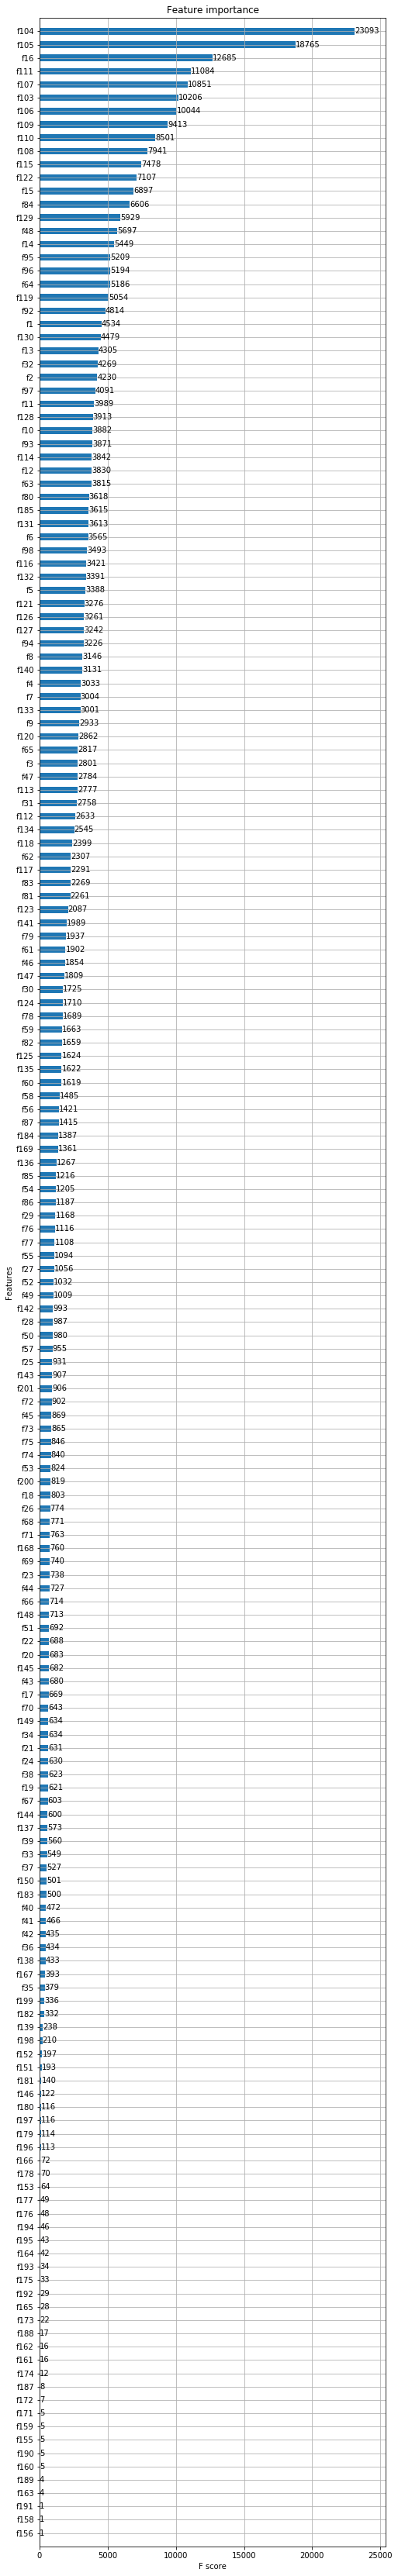

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 60))
xgb.plot_importance(bst, height=0.5, ax=ax)